In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


In [2]:
F = 1
V1 = 5
V2 = 10
cin = 1
A = np.array([[-F/V1,0],[F/V2,-F/V2]])
B = np.array([F/V1,0])
def model(t, c):
    dcdt = A@c + B*cin
    return dcdt

In [3]:
c0 = np.array([0,0])
t_span = [0,60.]
sol = solve_ivp(model, t_span, c0, atol=1e-9, rtol=1e-6)
t = sol.t
c = sol.y.T

In [4]:
def discrete_model(h, tend):
    e1 = np.exp(-F*h/V1)
    e2 = np.exp(-F*h/V2)
    phi = np.array([
                [e1, 0],
                [V1/(V1-V2)*(e1-e2), e2]
                ])
    gamma = np.array([1-e1, (1/(V1-V2))*(-V1*e1+V2*e2+V1-V2)])
    C = np.array([0, 1])
    # Initial time
    ti = 0
    xi = [0, 0]
    yi = C@xi
    # Save t, x and y in list of lists
    t = [ti]
    x = [xi]
    y = [yi]
    # Loop for each sample
    while ti<tend:
        ti += h
        xi = phi@xi + gamma*cin
        yi = C@xi
        t.append(ti)
        x.append(xi)
        y.append(yi)
    # Convert lists to np arrays
    t = np.array(t)
    x = np.array(x)
    y = np.array(y)
    return t, x, y

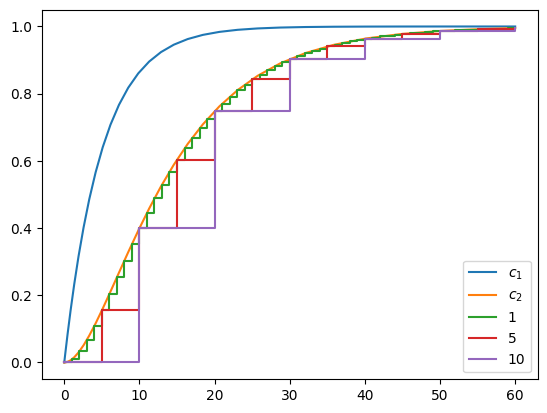

In [5]:
plt.figure()
plt.plot(t, c[:,0], label=r'$c_1$')
plt.plot(t, c[:,1], label=r'$c_2$')

for h in [1,5,10]:
    t, x, y = discrete_model(h, 60)
    plt.step(t,y, where='post', label=h)
    plt.legend()